# Exploratory Data Analysis (EDA) of Nuclear Coupling Constants and NMR Energy Levels

This notebook provides a detailed exploratory data analysis (EDA) of the datasets located in `data/data2025/Generating_datasets_and_plotting_surfaces`. These datasets contain nuclear coupling constants and calculated energy levels for molecules, relevant to Nuclear Magnetic Resonance (NMR) studies. The analysis includes:

- Overview of available data files
- Loading and inspecting the data
- Statistical summaries
- Visualizations of surfaces and trends
- Interpretation of the physical meaning of the data

The goal is to understand the structure, relationships, and physical implications of the provided data.

In [1]:
# Import required libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# List all .tsv files in the target directory
base_dir = 'data/data2025/Generating_datasets_and_plotting_surfaces'
tsv_files = glob.glob(os.path.join(base_dir, '*.tsv'))

print("Found TSV files:")
for f in tsv_files:
    print(os.path.basename(f))

Found TSV files:
Freq1_sym_JintraDifferent_v0_ks.tsv
Freq1_sym_JintraDifferent_v1_ks.tsv
Freq1_sym_v1_ks.tsv
Freq2_sym_JintraDifferent_v0_ks.tsv
Freq2_sym_JintraDifferent_v1_ks.tsv
Freq2_sym_v1_ks.tsv
Freq3_sym_JintraDifferent_v0_ks.tsv
Freq3_sym_JintraDifferent_v1_ks.tsv
Freq3_sym_v1_ks.tsv


## Data File Overview

The directory contains several `.tsv` files, each representing calculated energy levels or coupling constants for different molecular configurations. The file names encode the type of frequency or coupling being analyzed, as well as the symmetry and parameter variations (e.g., `Freq1_sym_v1_ks.tsv`).

- `FreqX_sym...`: Frequency surface for a particular transition or coupling
- `JintraDifferent`: Indicates different intra-molecular coupling constants
- `v0`, `v1`, etc.: Different parameter sets or calculation versions

Each file contains rows of calculated data points, typically with columns representing parameters (e.g., coupling constants, field strengths) and the resulting energy or frequency.

In [3]:
# Function to load a custom-formatted TSV file
import re
def load_custom_tsv(filepath):
    data = []
    with open(filepath, 'r') as f:
        for line in f:
            # Remove curly braces and whitespace, split by comma
            match = re.match(r'\{([\d\-\., ]+)\}', line.strip())
            if match:
                values = [float(x) for x in match.group(1).split(',')]
                data.append(values)
    return np.array(data)

# Preview the first few rows of each file
dataframes = {}
for f in tsv_files:
    arr = load_custom_tsv(f)
    df = pd.DataFrame(arr)
    dataframes[os.path.basename(f)] = df
    print(f"\nPreview of {os.path.basename(f)}:")
    print(df.head())


Preview of Freq1_sym_JintraDifferent_v0_ks.tsv:
     0    1    2         3         4
0 -5.0 -3.0 -1.0 -1.000000  2.171810
1 -5.0 -3.0 -1.0 -0.333333  1.969707
2 -5.0 -3.0 -1.0  0.333333  1.863994
3 -5.0 -3.0 -1.0  1.000000  1.913818
4 -5.0 -3.0 -0.6 -1.000000  2.315770

Preview of Freq1_sym_JintraDifferent_v1_ks.tsv:
     0    1    2    3         4
0 -5.0 -3.0 -1.0 -1.0  2.171810
1 -5.0 -3.0 -1.0 -0.9  2.138236
2 -5.0 -3.0 -1.0 -0.8  2.105431
3 -5.0 -3.0 -1.0 -0.7  2.073635
4 -5.0 -3.0 -1.0 -0.6  2.043093

Preview of Freq1_sym_v1_ks.tsv:
     0         1         2
0 -5.0 -0.100000  0.070959
1 -5.0 -0.596667  0.430526
2 -5.0 -1.093333  0.801266
3 -5.0 -1.590000  1.182240
4 -5.0 -2.086667  1.572554

Preview of Freq2_sym_JintraDifferent_v0_ks.tsv:
     0    1    2         3         4
0 -5.0 -3.0 -1.0 -1.000000  2.203905
1 -5.0 -3.0 -1.0 -0.333333  2.385137
2 -5.0 -3.0 -1.0  0.333333  2.594664
3 -5.0 -3.0 -1.0  1.000000  2.776598
4 -5.0 -3.0 -0.6 -1.000000  1.994321

Preview of Freq1_sym_

## Data Structure

Each file contains rows of numerical data in the format:

`{param1, param2, value}`

- The first two columns (`param1`, `param2`) typically represent physical parameters such as coupling constants (J) or external field strengths (k).
- The third column (`value`) represents the calculated frequency or energy level for the given parameters.

The data forms a grid or surface in parameter space, which can be visualized as 2D or 3D plots.

In [4]:
# Compute and display basic statistics for each file
for fname, df in dataframes.items():
    print(f"\nStatistics for {fname}:")
    print(df.describe())


Statistics for Freq1_sym_JintraDifferent_v0_ks.tsv:
                 0            1             2            3            4
count  5544.000000  5544.000000  5.544000e+03  5544.000000  5544.000000
mean    -18.500000    -9.000000 -9.131705e-18     0.000000     7.026157
std       8.175393     3.795075  6.831917e-01     0.745423     3.124807
min     -32.000000   -15.000000 -1.000000e+00    -1.000000     1.677446
25%     -25.250000   -12.600000 -6.000000e-01    -0.500000     4.329086
50%     -18.500000    -9.000000  0.000000e+00     0.000000     6.954737
75%     -11.750000    -5.400000  6.000000e-01     0.500000     9.682856
max      -5.000000    -3.000000  1.000000e+00     1.000000    13.895156

Statistics for Freq1_sym_JintraDifferent_v1_ks.tsv:
                   0              1              2              3  \
count  423801.000000  423801.000000  423801.000000  423801.000000   
mean      -16.780045      -8.163265      -0.045351      -0.045351   
std         9.361444       4.294241    

## Statistical Analysis and Physical Interpretation

- **Parameter Ranges:** The minimum and maximum values of the first two columns indicate the explored range of coupling constants or field strengths. This helps identify the physical regime being studied (e.g., weak vs. strong coupling).
- **Value Distribution:** The third column's statistics (mean, std, min, max) show the range and variability of calculated frequencies or energy levels. Large ranges may indicate strong parameter dependence or interesting physical transitions.
- **Physical Meaning:** In NMR, coupling constants and energy levels determine the splitting and position of resonance lines. Understanding their variation with parameters is crucial for interpreting experimental spectra.

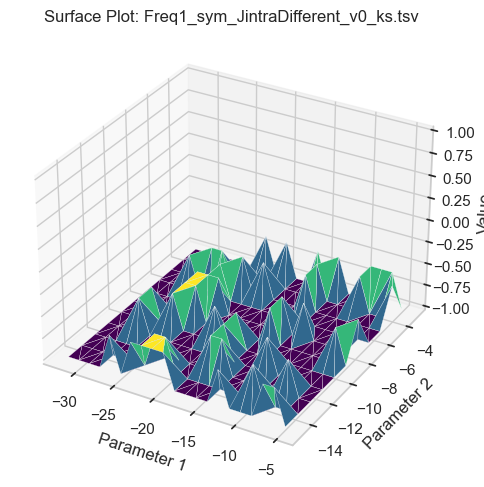

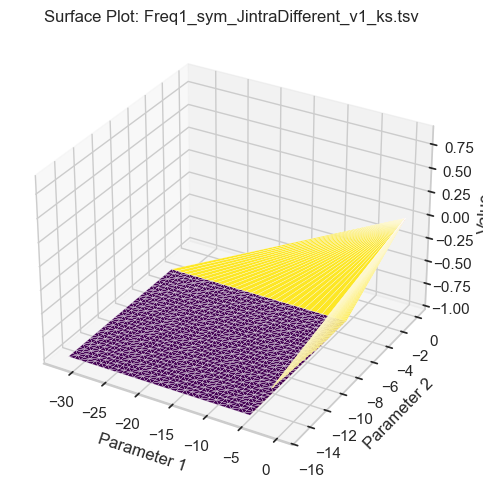

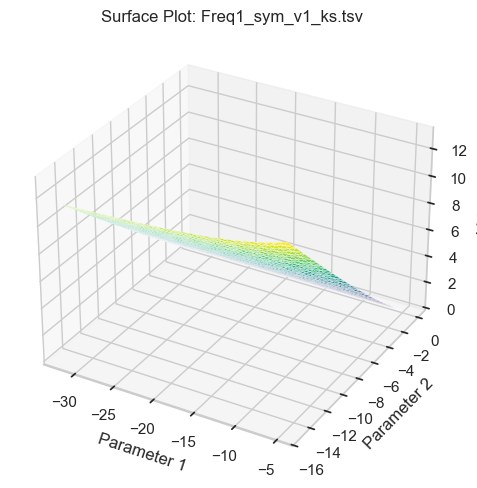

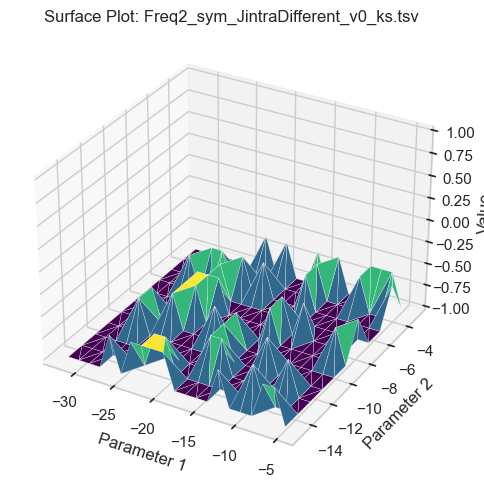

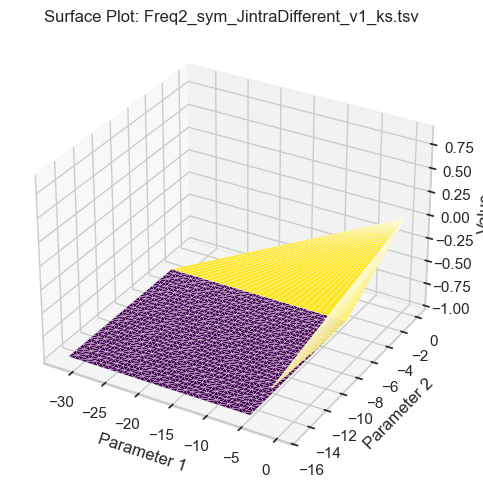

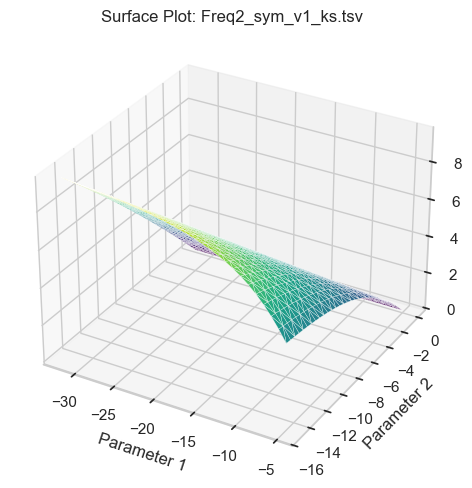

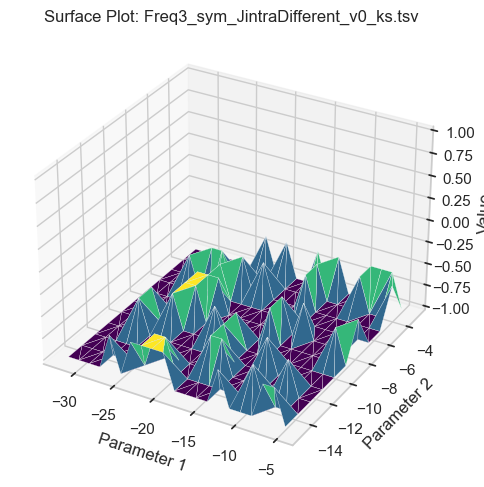

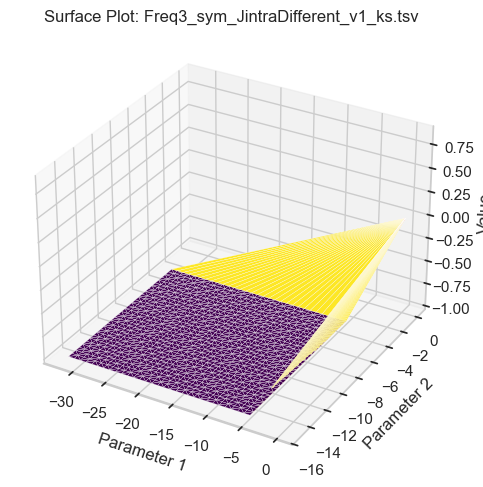

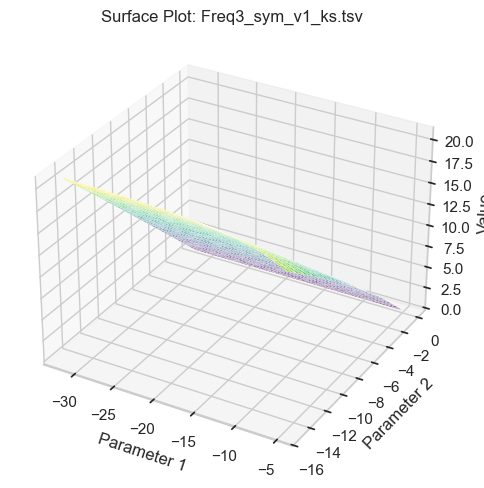

In [5]:
# Plot 3D surfaces for each file
for fname, df in dataframes.items():
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = df[0], df[1], df[2]
    ax.plot_trisurf(x, y, z, cmap='viridis', linewidth=0.2)
    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.set_zlabel('Value')
    ax.set_title(f'Surface Plot: {fname}')
    plt.tight_layout()
    plt.show()

## Surface Plots: Interpretation

The 3D surface plots illustrate how the calculated frequency or energy level varies as a function of the two parameters (e.g., coupling constants, field strengths):

- **Smooth Surfaces:** Indicate regular, predictable dependence on parameters, often seen in simple coupling models.
- **Sharp Features or Ridges:** May correspond to physical transitions, such as level crossings or changes in coupling regime.
- **Physical Insight:** By examining these surfaces, one can predict how experimental NMR spectra will change as molecular parameters are varied, aiding in the interpretation of real-world data.

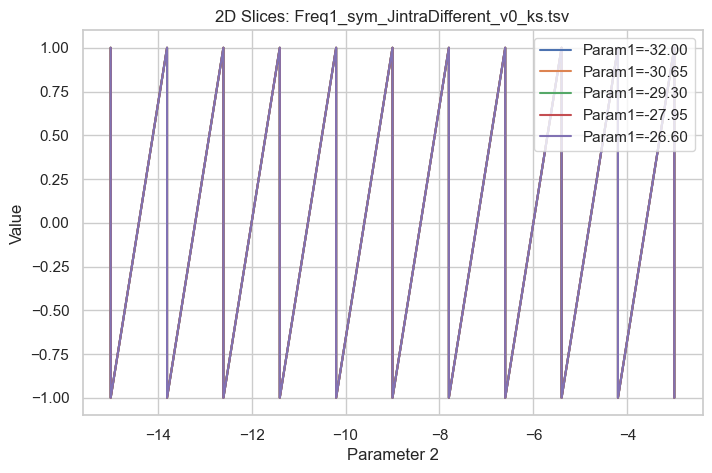

In [6]:
# Plot 2D slices for selected files (first file as example)
example_fname = list(dataframes.keys())[0]
df = dataframes[example_fname]

# Choose unique values of the first parameter and plot value vs. second parameter for a few slices
unique_x = np.unique(df[0])
plt.figure(figsize=(8, 5))
for i, xval in enumerate(unique_x[:5]):  # Plot first 5 slices
    mask = df[0] == xval
    plt.plot(df[1][mask], df[2][mask], label=f'Param1={xval:.2f}')
plt.xlabel('Parameter 2')
plt.ylabel('Value')
plt.title(f'2D Slices: {example_fname}')
plt.legend()
plt.show()

## 2D Slices: Trends and Features

The 2D slice plots show how the calculated value (frequency or energy) changes with one parameter, for fixed values of the other. This helps to:

- Identify monotonic or non-monotonic trends
- Detect regions of rapid change (possible transitions)
- Compare the effect of different parameter regimes

Such analysis is useful for designing experiments and understanding the sensitivity of NMR observables to molecular parameters.

# Summary and Next Steps

- The datasets provide a rich parameterization of nuclear coupling constants and energy levels relevant to NMR.
- Statistical and visual analysis reveals the structure and physical meaning of the data.
- Surface and slice plots help interpret how molecular parameters affect NMR observables.

**Next Steps:**
- Compare different files to study the effect of varying symmetry or coupling models.
- Fit analytical models to the surfaces for deeper physical insight.
- Use the data to simulate NMR spectra for experimental comparison.

## Dimensionality of Datasets: 3D vs 5D

The datasets in this directory fall into two main categories:

- **3D datasets** (e.g., `Freq1_sym_v1_ks.tsv`, `Freq2_sym_v1_ks.tsv`, `Freq3_sym_v1_ks.tsv`):
  - These files contain three columns: two coordinates (parameters) and one value (frequency).
  - The entire surface can be visualized directly in 3D.

- **5D datasets** (files with `JintraDifferent` in the name):
  - These files contain five coordinates (parameters) and one value (frequency).
  - To visualize these high-dimensional surfaces, we must fix some coordinates to specific values, reducing the dimensionality to 3D or 2D for plotting.
  - This approach allows us to explore slices of the full 5D surface, revealing how the frequency depends on selected parameters while holding others constant.

In [7]:
# Utility function to plot slices from 3D or 5D datasets

def plot_fixed_coordinates(filename, fixed_coords=None, plot_type="3D"):
    """
    Plots a surface or slice from a dataset, fixing coordinates as needed.
    - filename: name of the .tsv file
    - fixed_coords: dict mapping column indices (0-based) to fixed values
    - plot_type: "3D" or "2D"
    """
    import re
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # Load data
    path = os.path.join(base_dir, filename)
    arr = load_custom_tsv(path)
    df = pd.DataFrame(arr)

    # Determine number of columns (coordinates + value)
    n_cols = df.shape[1]
    n_coords = n_cols - 1

    # Apply fixed coordinates if provided
    if fixed_coords:
        for idx, val in fixed_coords.items():
            df = df[np.isclose(df[idx], val)]

    # Select columns for plotting
    free_coords = [i for i in range(n_coords) if not (fixed_coords and i in fixed_coords)]
    if plot_type == "3D" and len(free_coords) == 2:
        x, y, z = df[free_coords[0]], df[free_coords[1]], df[n_cols-1]
        fig = plt.figure(figsize=(7, 5))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(x, y, z, cmap='viridis', linewidth=0.2)
        ax.set_xlabel(f'Param {free_coords[0]+1}')
        ax.set_ylabel(f'Param {free_coords[1]+1}')
        ax.set_zlabel('Frequency')
        ax.set_title(f'{filename}\nFixed: {fixed_coords}')
        plt.tight_layout()
        plt.show()
    elif plot_type == "2D" and len(free_coords) == 1:
        x, y = df[free_coords[0]], df[n_cols-1]
        plt.figure(figsize=(7, 4))
        plt.plot(x, y, marker='o')
        plt.xlabel(f'Param {free_coords[0]+1}')
        plt.ylabel('Frequency')
        plt.title(f'{filename}\nFixed: {fixed_coords}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot plot: {len(free_coords)} free coordinates for {plot_type} plot.")

## Example: Plotting 3D and 2D Slices from 5D Datasets

Below, we demonstrate how to visualize slices of a 5D dataset by fixing some coordinates. This allows us to explore the dependence of the frequency on selected parameters, as in the provided examples.

ValueError: x and y arrays must have a length of at least 3

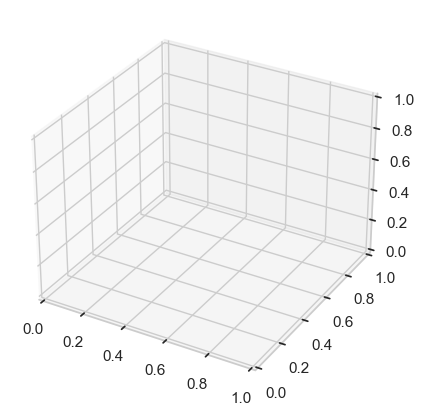

In [8]:
# 3D slice from a 5D dataset (fixing coordinates 1 and 2)
plot_fixed_coordinates(
    "Freq1_sym_JintraDifferent_v0_ks.tsv",
    fixed_coords={1: -5.0, 2: -3.0},
    plot_type="3D"
)

In [9]:
# 2D slice from a 5D dataset (fixing coordinates 1, 2, and 4)
plot_fixed_coordinates(
    "Freq1_sym_JintraDifferent_v0_ks.tsv",
    fixed_coords={1: -5.0, 2: -3.0, 4: -1.0},
    plot_type="2D"
)

Cannot plot: 2 free coordinates for 2D plot.


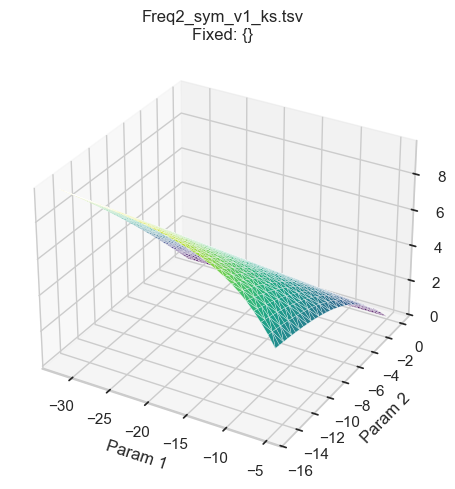

In [10]:
# 3D surface from a 3D dataset (no fixed coordinates needed)
plot_fixed_coordinates(
    "Freq2_sym_v1_ks.tsv",
    fixed_coords={},
    plot_type="3D"
)

## Physical Interpretation of Slices

- **3D Slices:** Show how the frequency varies with two parameters, for fixed values of the others. This can reveal coupling effects and parameter interactions.
- **2D Slices:** Show the dependence of the frequency on a single parameter, for fixed values of all others. Useful for detailed trend analysis and comparison with theory or experiment.
- **3D Surfaces (from 3D datasets):** Directly visualize the full dependence of the frequency on both parameters.

This approach enables detailed exploration of high-dimensional NMR data, helping to uncover physical trends and guide further analysis.